# Learning NLP with nltk

## Statistics

bigrams/trigrams

FreqDist/ConditionalFreqDist

In [1]:
import nltk

In [1]:

def twoword(s):
    # delete the nonwords
    # get bigrams, combine them with ' '
    return (a+' '+b for a, b in nltk.bigrams(w for w in s.split() if w.isalpha()))

def fromFile(file, hook=twoword):
    with open(file) as fo:
        return nltk.FreqDist(hook(fo.read()))

corpus_root = '/Users/william/Folders/mycorpus/'

def follow(s, w, n=1):
    # print w and words following it in s
    # example: ['in', 'one', 'dimension,', 'for', '$1', '<']
    k = 0
    while k < len(s):
        a = s[k]
        if a == w:
            print(s[k:k+n+1])
            k += n
        else:
            k += 1
            
f = corpus_root + 'wavelets.tex'
with open(f) as fo:
    s = fo.read()
s = s.split()
follow(s, 'in', 5)

['in', 'one', 'dimension,', 'for', '$1', '<']
['in', '$L^p$~norm', 'to', '$f$;', 'however,', 'the']
['in', 'applications', 'almost', 'always', 'rely', 'on']
['in', '$P_J', 'f$', 'converges', 'absolutely', 'since']
['in', 'the', 'next', 'section', '(though', 'for']
['in', '[3].', 'The', 'non-linear', 'hard', 'and']
['in', 'applications', '(see', '[1],[2])', 'but', 'this']
['in', 'an', 'arbitrary', 'order,', 'and', '(with']
['in', 'this', 'paper', 'originated', 'from', 'a']
['in', 'magnitude', 'by', 'the', 'maximal', 'function.']
['in', '[5].', 'Let', '$f$', 'be', 'an']
['in', '$L^p(\\R)$.', 'We', 'first', 'show', 'that']
['in', 'an', '$L^p$', 'class', 'for', 'some']
['in', '$C^\\infty_0(\\R)$', 'for', 'which', '$|M(f-g)(x)|', '\\leq']
['in', 'the', 'expansion', 'of', '$h$,', 'and']
['in', '[3]', 'under', 'weaker', 'decay', 'hypotheses']
['in', 'a', 'distributional', 'sense', 'to', '$\\delta(x-y)$.']
['in', 'an', '$L^p$', 'class', 'for', 'some']
['in', 'the', 'summation', 'for', '$T_\\la

## Read texts from pdf

In [3]:
#!/usr/bin/env python
# encoding: utf-8
import logging
logging.propagate = False 
logging.getLogger().setLevel(logging.ERROR)

from pdfminer.pdfparser import PDFParser,PDFDocument
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import PDFPageAggregator
from pdfminer.layout import LTTextBoxHorizontal,LAParams
from pdfminer.pdfinterp import PDFTextExtractionNotAllowed


def pdf2str(filename):
    fp = open(filename, 'rb')
    praser = PDFParser(fp)
    doc = PDFDocument()
    praser.set_document(doc)
    doc.set_parser(praser)
    doc.initialize()

    if not doc.is_extractable:
        raise PDFTextExtractionNotAllowed
    else:
        rsrcmgr = PDFResourceManager()
        laparams = LAParams()
        device = PDFPageAggregator(rsrcmgr, laparams=laparams)
        interpreter = PDFPageInterpreter(rsrcmgr, device)
        s = ''
        for page in doc.get_pages():
            interpreter.process_page(page)
            layout = device.get_result()
            for x in layout:
                if isinstance(x, LTTextBoxHorizontal):
                    results = x.get_text()
                    s += results
        return s

s = pdf2str(corpus_root + 'terence.pdf')
s = s.split()
follow(s, 'in', 5)

['in', '2003,', 'Grisha', 'Perelman', 'signiﬁcantly', 'advanced']
['in', 'a', 'program', 'to', 'understand', 'the']
['in', '[29]', 'Perelman', 'showed', 'that', 'in']
['in', 'three', 'spatial', 'dimensions', 'there', 'was']
['in', 'ﬁnite', 'time', '(thus', 'there', 'exists']
['in', 'particular', 'includes', 'the', 'projective', 'space']
['in', '[28],', '[29],', '[30]', 'for', 'general']
['in', 'fact', 'quite', 'natural,', 'because', 'the']
['in', 'the', 'category', 'of', 'simply', 'connected']
['in', 'communication', 'with', 'each', 'other', 'and']
['in', 'every', 'important', 'detail.', 'In', 'particular']
['in', 'fact', 'will', 'commit', 'a', 'number']
['in', 'order', 'to', 'suppress', 'certain', 'technical']
['in', 'the', 'proof', 'of', 'the', 'true']
['in', 'an', 'ahistorical', 'order,', 'in', 'order']
['in', 'several', 'other', 'places', '(see', 'e.g.']
['in', 'the', 'ﬁeld', 'have', 'also', 'made']
['in', '[5],', '[22],', '[27]', 'to', 'fully']
['in', '[5],', '[22],', '[27]', 'for

## Read texts from doc files

In [3]:
import docx
#docx.Document(corpus_root+'zjc.doc')
import codecs

f = corpus_root+'zjjy.txt'
with open(f, encoding='gb2312') as fo:
    s = fo.read()
# bg = nltk.bigrams([w for w in s.split() if w.isalpha()])
# cfd = nltk.ConditionalFreqDist([(a, b) for a, b in bg])

fd = nltk.FreqDist(s)


FreqDist({'分': 71, '，': 68, '学': 66, '\n': 62, '工': 61, '1': 57, '2': 55, '。': 53, '的': 51, '江': 47, ...})

In [4]:
#from nltk.corpus import PlaintextCorpusReader
#wl = PlaintextCorpusReader(corpus_root, '.*')
# wl.fileids()

# Conditional Distribution
import pathlib
corpus_root = pathlib.Path('/Users/William/Folders/mycorpus')
f = corpus_root / 'wavelets.tex'
with open(f) as fo:
    s = fo.read()
bg = nltk.bigrams([w for w in s.split() if w.isalpha()])
cfd = nltk.ConditionalFreqDist([(a, b) for a, b in bg])
# cfd.tabulate()


# wordnet

In [1]:
nltk.download('wordnet')
wnl = nltk.WordNetLemmatizer()
raw = 'Lily loves flowers'
tokens = nltk.word_tokenize(raw)
[wnl.lemmatize(t) for t in tokens]

NameError: name 'nltk' is not defined

## Tokenize
Important for linguistic analysis

tokenize -> tag

In [10]:

sentence = """At eight o'clock on Thursday morning. Arthur didn't feel very good."""
tokens = nltk.word_tokenize(sentence)
tags = nltk.pos_tag(tokens)

## Corpus

download corpus with `nltk.download('sinica_treebank')`

Searched in:
    - '/Users/william/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.6/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.6/share/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.6/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    
`nltk.app.concordance()`  concordance tool

In [13]:
tagged = nltk.tag.str2tuple('fly/NN') # => ('fly', 'NN')

In [22]:
nltk.corpus.brown.tagged_words()
nltk.corpus.treebank.tagged_words()
nltk.corpus.brown.tagged_words(categories='news')

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ...]

In [28]:
# dict of tag: word1, word2, ...
memory = {}
for word, tag in nltk.corpus.brown.tagged_words():
    if tag in memory:
        memory[tag].add(word)
    else:
        memory[tag] = {word}

In [31]:
# tags depend on their context in sentences
tagged_sents = nltk.corpus.brown.tagged_sents(categories='news')
tagged_sents

[[('The', 'AT'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('Grand', 'JJ-TL'), ('Jury', 'NN-TL'), ('said', 'VBD'), ('Friday', 'NR'), ('an', 'AT'), ('investigation', 'NN'), ('of', 'IN'), ("Atlanta's", 'NP$'), ('recent', 'JJ'), ('primary', 'NN'), ('election', 'NN'), ('produced', 'VBD'), ('``', '``'), ('no', 'AT'), ('evidence', 'NN'), ("''", "''"), ('that', 'CS'), ('any', 'DTI'), ('irregularities', 'NNS'), ('took', 'VBD'), ('place', 'NN'), ('.', '.')], [('The', 'AT'), ('jury', 'NN'), ('further', 'RBR'), ('said', 'VBD'), ('in', 'IN'), ('term-end', 'NN'), ('presentments', 'NNS'), ('that', 'CS'), ('the', 'AT'), ('City', 'NN-TL'), ('Executive', 'JJ-TL'), ('Committee', 'NN-TL'), (',', ','), ('which', 'WDT'), ('had', 'HVD'), ('over-all', 'JJ'), ('charge', 'NN'), ('of', 'IN'), ('the', 'AT'), ('election', 'NN'), (',', ','), ('``', '``'), ('deserves', 'VBZ'), ('the', 'AT'), ('praise', 'NN'), ('and', 'CC'), ('thanks', 'NNS'), ('of', 'IN'), ('the', 'AT'), ('City', 'NN-TL'), ('of', 'IN-TL'), ('Atlant

## Self-defined tagger

DefaultTagger/RegexpTagger

UnigramTagger/BigramTagger/...

### Combine taggers
```python
t1= Tagger(model, backoff=t0)
t2= Tagger(model, backoff=t1)
```

In [37]:
# nltk.DefaultTagger('NN')
# patterns = [(regexp, tag)]
# nltk.RegexpTagger(patterns)

# UnigramTagger({word:tag}, backoff)
words = nltk.corpus.brown.words()
tagged_words = nltk.corpus.brown.tagged_words()
fd = nltk.FreqDist(words)
cfd = nltk.ConditionalFreqDist(tagged_words)
model = {word:cfd[word].max() for word in list(fd.keys())[:100]}
tagger = nltk.UnigramTagger(model=model, backoff=nltk.DefaultTagger('NN'))
tagger.evaluate(tagged_sents)

tagger.tag(tagged_sents[3])

0.4602999383415876

```python
class MyTagger(nltk.TaggerI):
    def __init__(self, train):
        ...
    def tag(self, sentence):
        pass
```

# Classification

```python
train = [({'f':x}, y)]  # list of input-output pairs
classifier = nltk.NaiveBayesClassifier.train(train)
nltk.classify.accuracy(classifier, test)
```

[name_gender](https://github.com/Freakwill/name_gender)

In [4]:
# nltk.download('names')

# names = [(name, 'male') for name in nltk.corpus.names.words('male.txt')] + [(name, 'female') for name in nltk.corpus.names.words('female.txt')]
# train, test = features[500:], featrues[:500]
# classifier = nltk.NaiveBayesClassifier.train(train)


# RTE

In [8]:
# rtepair = nltk.corpus.rte.pairs(['rte3_dev.xml'])[33]
# rtepair = nltk.corpus.rte.pairs('I am a Person', 'I love you')
# extractor = nltk.classify.rte_classify.RTEFeatureExtractor(rtepair)
# rte_features(rtepair)

# Information Theory

In [43]:
import scipy

def entropy(xs):
    fd = nltk.FreqDist(xs)
    ps = [p for x, p in fd.items()]
    # ps = list(fd.values())
    return scipy.stats.entropy(ps, base=2)

xs = ['male', 'female', 'male', 'male']
entropy(xs)

0.8112781244591328

In [33]:
scipy.stats.entropy([2,2], base=2)

1.0

# Text Parsing

In [16]:
sentence='The little yellow dog barked at the cat owned by Lucy.'
tokens = nltk.word_tokenize(sentence)
tags = nltk.pos_tag(tokens)

print(tags)

# cp = nltk.RegexpParser("")
# result = cp.parse(tags)
# print(result)

grammar = r"""
NP: {<DT>?<JJ>*<NN>}
{<NNP>+}
"""  # NP - chunking
cp = nltk.RegexpParser(grammar)
result = cp.parse(tags)  # grammar tree
print(result)


[('The', 'DT'), ('little', 'JJ'), ('yellow', 'JJ'), ('dog', 'NN'), ('barked', 'VBD'), ('at', 'IN'), ('the', 'DT'), ('cat', 'NN'), ('owned', 'VBN'), ('by', 'IN'), ('Lucy', 'NNP'), ('.', '.')]
(S
  (NP The/DT little/JJ yellow/JJ dog/NN)
  barked/VBD
  at/IN
  (NP the/DT cat/NN)
  owned/VBN
  by/IN
  (NP Lucy/NNP)
  ./.)


In [25]:
# subtrees of a grammar tree
for subtree in result.subtrees():
    print(subtree.label())

S
NP
NP
NP


## CoNLL2000 Chunking

In [2]:
text = """
he PRP B-NP
accepted VBD B-VP
the DT B-NP
position NN I-NP
. . O
"""
nltk.chunk.conllstr2tree(text, chunk_types=['NP']).draw()

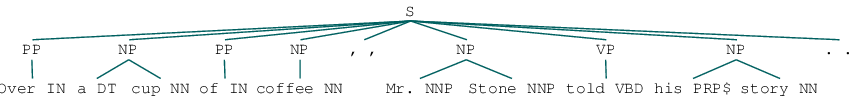

In [6]:

nltk.corpus.conll2000.chunked_sents('train.txt')[99]

## Grammar Analysis

In [30]:
grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
""")

for p in grammar.productions():
    p.lhs(), p.rhs()


(S, (NP, VP))

(PP, (P, NP))

(NP, (Det, N))

(NP, (Det, N, PP))

(NP, ('I',))

(VP, (V, NP))

(VP, (VP, PP))

(Det, ('an',))

(Det, ('my',))

(N, ('elephant',))

(N, ('pajamas',))

(V, ('shot',))

(P, ('in',))

In [ ]:

sent = ['I', 'shot', 'an', 'elephant', 'in', 'my', 'pajamas']
parser = nltk.ChartParser(grammar)  # Chart Parser, WFST
trees = parser.parse(sent)
for tree in trees:
    print(tree)
    
# rd_parser = nltk.RecursiveDescentParser(grammar)
# for i in rd_parser.parse(sent):
#     print(i)


## Shift-Reduce
* Shift: 此解析器反复将下个输入词push进stack。
* Reduce: if stack前n项，匹配表达式右侧的n个项目，then 弹出栈，and 将产生式左边项目压如栈。

两个缺点:
- 由于堆栈的特殊性，只能找到一种解析
- 不能保证一定能找到解析


In [24]:
parser = nltk.ShiftReduceParser(grammar)
list(parser.parse(sent))

[]

In [32]:
parser = nltk.ProjectiveDependencyParser(grammar)
trees = parser.parse(sent)


# Feature Syntax

## AVM

$\left[\begin{align} POS & N &\\
 &  PER & 3 \\
ARG    & NUM & pl \\
    & GND & fem 
    \end{align}\right]$

## Feature Struct

```python
fs0 = FeatStruct(PER=3, NUM='pl', GND='fem')
fs = FeatStruct(POS='N', ARG=fs0)
FeatStruct("[POS='N', AGR=[PER=3, NUM='pl', GND='fem']]")
```

In [5]:
nltk.data.show_cfg('grammars/book_grammars/feat0.fcfg')
cp=nltk.load_parser('grammars/book_grammars/feat0.fcfg', trace=2)
trees = cp.parse('Kim likes children'.split())

for tree in trees:
    print(tree)

% start S
# ###################
# Grammar Productions
# ###################
# S expansion productions
S -> NP[NUM=?n] VP[NUM=?n]
# NP expansion productions
NP[NUM=?n] -> N[NUM=?n] 
NP[NUM=?n] -> PropN[NUM=?n] 
NP[NUM=?n] -> Det[NUM=?n] N[NUM=?n]
NP[NUM=pl] -> N[NUM=pl] 
# VP expansion productions
VP[TENSE=?t, NUM=?n] -> IV[TENSE=?t, NUM=?n]
VP[TENSE=?t, NUM=?n] -> TV[TENSE=?t, NUM=?n] NP
# ###################
# Lexical Productions
# ###################
Det[NUM=sg] -> 'this' | 'every'
Det[NUM=pl] -> 'these' | 'all'
Det -> 'the' | 'some' | 'several'
PropN[NUM=sg]-> 'Kim' | 'Jody'
N[NUM=sg] -> 'dog' | 'girl' | 'car' | 'child'
N[NUM=pl] -> 'dogs' | 'girls' | 'cars' | 'children' 
IV[TENSE=pres,  NUM=sg] -> 'disappears' | 'walks'
TV[TENSE=pres, NUM=sg] -> 'sees' | 'likes'
IV[TENSE=pres,  NUM=pl] -> 'disappear' | 'walk'
TV[TENSE=pres, NUM=pl] -> 'see' | 'like'
IV[TENSE=past] -> 'disappeared' | 'walked'
TV[TENSE=past] -> 'saw' | 'liked'
|.Kim .like.chil.|
Leaf Init Rule:
|[----]    .    .| [0:

# Logic

prover9

[Howto](http://www.nltk.org/howto/logic.html)

In [2]:
from nltk.sem import Valuation, Model, Expression

In [8]:
pq = Expression.fromstring('P -> Q')
p = Expression.fromstring('P')
q = Expression.fromstring('Q')
prover = nltk.Prover9()
prover.prove(q, [pq, p])

True

## Model semantics

Model = Domain + Valuation

In [37]:
val = Valuation((('P', True), ('Q', True)))
val['P']
dom = set()
g = nltk.Assignment(dom)
m = nltk.Model(dom, val)
m.evaluate('P & Q', g)

True

True

## Predicate Logic

- expression
- type
- lambda expression

In [10]:
b = nltk.sem.Expression.fromstring('bullshit(leader)')
bx = nltk.sem.Expression.fromstring(r'\x.bullshit(x)')
bx

<LambdaExpression \x.bullshit(x)>

In [34]:
tlp = nltk.sem.logic.LogicParser(True)
print(tlp.parse('man(x)').type)

sig = {'man': '<e, t>'}
e = tlp.parse('man(x)', sig)
print(e.function.type)

?
<e,t>


### Model semantics

Model = Domain + Valution + Assignment

In [17]:

val=Valuation([('leader', 'l'),('bullshit', {'l'})])
dom = val.domain
m = Model(dom, val)
m.evaluate('bullshit(leader)', {})

dom = val.domain
g = nltk.sem.Assignment(dom, [('x', 'l')])

m.evaluate('bullshit(x)', g)

g = nltk.sem.Assignment(dom, [])
b = Expression.fromstring('bullshit(x)')
m.satisfiers(b, 'x', g)

True

True

{'l'}

## Build a model satifying the formulas

- Mace: find a model
- MaceCommand: find a conterexample

In [6]:
a = Expression.fromstring('exists x.(man(x) & walks(x))')
c1 = Expression.fromstring('mortal(socrates)')
c2 = Expression.fromstring('all x. (man(x) -> mortal(x))')
c3 = Expression.fromstring('man(socrates)')
c4 = Expression.fromstring('-mortal(socrates)')
mb = nltk.Mace(5)
mb.build_model(None, [c1, c2])
mb.build_model(None, [c3, c2, c4])

True

False

In [6]:
a = Expression.fromstring('all x. (man(x) -> love(x, lucy) | love(x, mary))')
b = Expression.fromstring('man(bob)')
c = Expression.fromstring('man(carl)')
d = Expression.fromstring('love(carl, mary)')
mc = nltk.MaceCommand(d, assumptions=[a, b, c])
mc.build_model()

True

In [7]:
print(mc.valuation)

{'bob': 'a',
 'carl': 'a',
 'love': {('a', 'a')},
 'lucy': 'a',
 'man': {('a',)},
 'mary': 'b'}


## lambda calculus

In [13]:
tvp=Expression.fromstring('\X x. X(\y.chase(x, y))')
np=Expression.fromstring('\P.exists x.(dog(x) & P(x))')
vp=nltk.ApplicationExpression(tvp, np)
print(vp)
print(vp.simplify())  # beta-convert
print(tvp.alpha_convert(nltk.Variable('Z')))

vp1=Expression.fromstring('(\X x. X(\y.chase(x, y)))(\P.exists x.(dog(x) & P(x)))')
print(vp1)
print(vp1.simplify())  # beta-convert
print(vp1==vp)

(\X x.X(\y.chase(x,y)))(\P.exists x.(dog(x) & P(x)))
\x.exists z11.(dog(z11) & chase(x,z11))
\Z x.Z(\y.chase(x,y))
(\X x.X(\y.chase(x,y)))(\P.exists x.(dog(x) & P(x)))
\x.exists z12.(dog(z12) & chase(x,z12))
True


In [27]:
grammar_file = 'grammars/book_grammars/simple-sem.fcfg'
parser = nltk.load_parser(grammar_file, trace=0)
s = 'Cyril sees every boy'
t = s.split()
trees = parser.parse(t)
for tree in trees:
    print(tree.label())

[ *type* = 'S'                                    ]
[ SEM    = <all z20.(boy(z20) -> see(cyril,z20))> ]


In [29]:
val=Valuation([('cyril', 'c'),('bertie', 'b'), ('boy', {'b'}), ('see', {('m', 'b')})])
dom = val.domain
m = Model(dom, val)
g = nltk.sem.Assignment(dom)
res = nltk.sem.evaluate_sents([s], grammar_file, m, g)[0]
for syn, sem, val in res:
    print(syn)
    print(sem, val)

(S[SEM=<all z22.(boy(z22) -> see(cyril,z22))>]
  (NP[-LOC, NUM='sg', SEM=<\P.P(cyril)>]
    (PropN[-LOC, NUM='sg', SEM=<\P.P(cyril)>] Cyril))
  (VP[NUM='sg', SEM=<\x.all z22.(boy(z22) -> see(x,z22))>]
    (TV[NUM='sg', SEM=<\X x.X(\y.see(x,y))>, TNS='pres'] sees)
    (NP[NUM='sg', SEM=<\Q.all x.(boy(x) -> Q(x))>]
      (Det[NUM='sg', SEM=<\P Q.all x.(P(x) -> Q(x))>] every)
      (Nom[NUM='sg', SEM=<\x.boy(x)>]
        (N[NUM='sg', SEM=<\x.boy(x)>] boy)))))
all z22.(boy(z22) -> see(cyril,z22)) False


### Cooper Storage

- bind operator
- S-index

```
Every girl chases a dog.
core: chase(x,y)
bind: \P. exists y. (dog(y) & P(y)) (\z2. chase(z1, z2))
```

In [21]:
from nltk.sem import cooper_storage
s = 'every girl chases a dog'
t = cooper_storage.parse_with_bindops(s, grammar='grammars/book_grammars/storage.fcfg')
semrep = t[0].label()['SEM']
semrep
cs_semrep = cs.CooperStore(semrep)
print(cs_semrep.core)

[CORE=<chase(z2,z3)>, STORE=(bo(\P.all x.(girl(x) -> P(x)),z2), bo(\P.exists x.(dog(x) & P(x)),z3))]

chase(z2,z3)


In [16]:
for bo in cs_semrep.store:
    print(bo)  # bind operator

bo(\P.all x.(girl(x) -> P(x)),z2)
bo(\P.exists x.(dog(x) & P(x)),z3)
